**Навигация по уроку**

1. [Библиотеки визуализации данных в Python](https://colab.research.google.com/drive/1IbLhzlqiJhhPAErmdQ9wuIUdDaSRlNUF)
2. [Практика](https://colab.research.google.com/drive/1jukOs54u301WtyQS-SbRxWxDstTCjEBq)
3. Домашняя работа

Используя датасет о стоимости акций Сбербанка с 01.01.2013 года:

https://storage.yandexcloud.net/academy.ai/SBER.csv

визуализируйте индикатор "Полосы Боллинджера", проанализируйте график, и предложите вариант торговли акциями Сбербанка с помощью этого инструмента.

**Подсказка.**
Индикатор выглядит как полоса из трех линий:

* линия посередине — это простая скользящая средняя (SMA) с периодом `ma_size`, обычно около 20 дней;

* верхняя и нижняя линии (BB) — построены на основе SMА, но к нему добавленно стреднеквадратичное отклонение:

```
 SMA = data['close'].rolling(ma_size).mean()
 BB_UP = SMA + data['close'].rolling(ma_size).std() * bol_size
 BB_DOWN = SMA - data['close'].rolling(ma_size).std() * bol_size
   
```

где bol_size - ширина коридора, подбирается по графику. Выберите такое его значение, чтобы по графику можно было принимать торговые решения.

[*********************100%%**********************]  1 of 1 completed


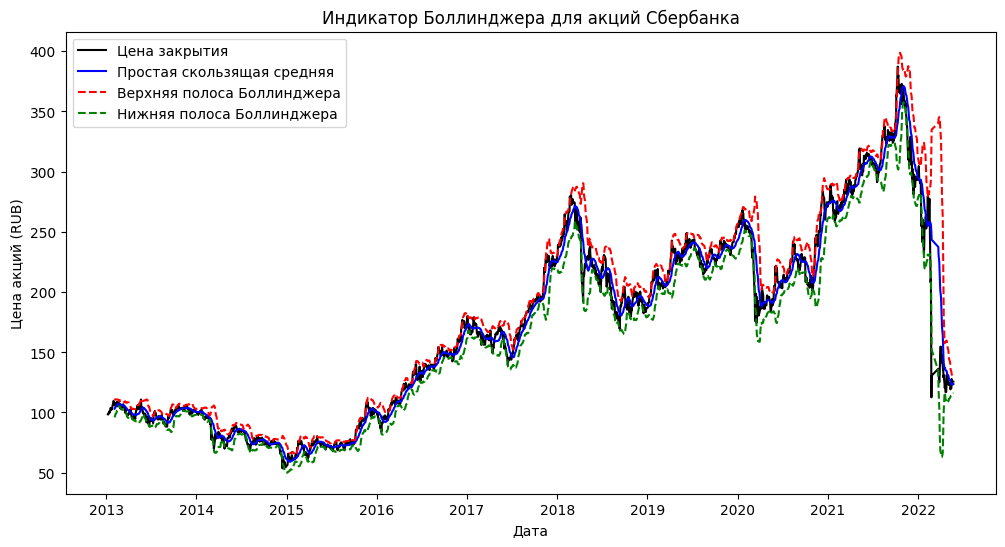

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Загрузим данные о стоимости акций Сбербанка с помощью yfinance
sber_data = yf.download('SBER.ME', start='2013-01-01')

# Параметры для индикатора Боллинджера
ma_size = 20
bol_size = 2

# Рассчитаем индикатор Боллинджера
sber_data['SMA'] = sber_data['Close'].rolling(ma_size).mean()
sber_data['BB_UP'] = sber_data['SMA'] + sber_data['Close'].rolling(ma_size).std() * bol_size
sber_data['BB_DOWN'] = sber_data['SMA'] - sber_data['Close'].rolling(ma_size).std() * bol_size

# Визуализируем индикатор
plt.figure(figsize=(12, 6))
plt.plot(sber_data.index, sber_data['Close'], label='Цена закрытия', color='black')
plt.plot(sber_data.index, sber_data['SMA'], label='Простая скользящая средняя', color='blue')
plt.plot(sber_data.index, sber_data['BB_UP'], label='Верхняя полоса Боллинджера', linestyle='dashed', color='red')
plt.plot(sber_data.index, sber_data['BB_DOWN'], label='Нижняя полоса Боллинджера', linestyle='dashed', color='green')

# Настройка графика
plt.title('Индикатор Боллинджера для акций Сбербанка')
plt.xlabel('Дата')
plt.ylabel('Цена акций (RUB)')
plt.legend()
plt.show()
